# CLIP Animal Classification Project
CSCI 6231 Final Project

In [1]:
import torch
import clip
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import cv2

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

model, preprocess = clip.load("ViT-B/32", device=device)

using cpu


  0%|                                               | 0.00/338M [00:00<?, ?iB/s]

  0%|▏                                     | 1.41M/338M [00:00<00:23, 14.7MiB/s]

  1%|▎                                     | 2.81M/338M [00:00<00:24, 14.2MiB/s]

  2%|▌                                     | 5.08M/338M [00:00<00:18, 18.5MiB/s]

  2%|▉                                     | 8.10M/338M [00:00<00:14, 23.6MiB/s]

  4%|█▎                                    | 12.0M/338M [00:00<00:11, 29.7MiB/s]

  5%|█▉                                    | 16.8M/338M [00:00<00:09, 36.9MiB/s]

  7%|██▍                                   | 22.0M/338M [00:00<00:07, 42.3MiB/s]

  8%|███                                   | 27.4M/338M [00:00<00:06, 46.9MiB/s]

 10%|███▋                                  | 33.2M/338M [00:00<00:06, 51.2MiB/s]

 11%|████▎                                 | 38.1M/338M [00:01<00:06, 51.0MiB/s]

 13%|█████                                 | 44.5M/338M [00:01<00:05, 55.9MiB/s]

 15%|█████▌                                | 49.8M/338M [00:01<00:05, 53.8MiB/s]

 17%|██████▎                               | 56.0M/338M [00:01<00:05, 57.0MiB/s]

 18%|███████                               | 62.4M/338M [00:01<00:04, 59.9MiB/s]

 20%|███████▋                              | 68.1M/338M [00:01<00:04, 59.9MiB/s]

 22%|████████▎                             | 74.2M/338M [00:01<00:04, 60.9MiB/s]

 24%|█████████                             | 80.2M/338M [00:01<00:04, 61.7MiB/s]

 26%|█████████▋                            | 86.4M/338M [00:01<00:04, 62.7MiB/s]

 27%|██████████▍                           | 92.8M/338M [00:01<00:04, 63.9MiB/s]

 29%|███████████▏                          | 98.9M/338M [00:02<00:04, 58.6MiB/s]

 32%|████████████▍                          | 107M/338M [00:02<00:03, 66.6MiB/s]

 34%|█████████████▏                         | 114M/338M [00:02<00:03, 66.9MiB/s]

 36%|█████████████▉                         | 120M/338M [00:02<00:03, 65.8MiB/s]

 37%|██████████████▌                        | 126M/338M [00:02<00:03, 58.3MiB/s]

 39%|███████████████▍                       | 133M/338M [00:02<00:03, 61.5MiB/s]

 41%|████████████████                       | 140M/338M [00:02<00:03, 62.9MiB/s]

 43%|████████████████▊                      | 146M/338M [00:02<00:03, 59.4MiB/s]

 45%|█████████████████▌                     | 152M/338M [00:02<00:03, 61.0MiB/s]

 47%|██████████████████▏                    | 158M/338M [00:03<00:03, 60.6MiB/s]

 49%|███████████████████▏                   | 166M/338M [00:03<00:02, 67.0MiB/s]

 51%|███████████████████▉                   | 172M/338M [00:03<00:02, 67.2MiB/s]

 53%|████████████████████▋                  | 179M/338M [00:03<00:02, 67.4MiB/s]

 55%|█████████████████████▍                 | 185M/338M [00:03<00:02, 66.9MiB/s]

 57%|██████████████████████▏                | 192M/338M [00:03<00:02, 66.9MiB/s]

 59%|██████████████████████▉                | 198M/338M [00:03<00:02, 67.4MiB/s]

 61%|███████████████████████▋               | 205M/338M [00:03<00:02, 67.1MiB/s]

 63%|████████████████████████▍              | 211M/338M [00:03<00:01, 67.2MiB/s]

 64%|█████████████████████████▏             | 218M/338M [00:03<00:01, 66.2MiB/s]

 66%|█████████████████████████▉             | 224M/338M [00:04<00:01, 66.4MiB/s]

 68%|██████████████████████████▋            | 231M/338M [00:04<00:01, 66.6MiB/s]

 70%|███████████████████████████▍           | 237M/338M [00:04<00:01, 64.2MiB/s]

 72%|████████████████████████████           | 243M/338M [00:04<00:01, 64.6MiB/s]

 74%|████████████████████████████▊          | 250M/338M [00:04<00:01, 65.8MiB/s]

 76%|█████████████████████████████▌         | 256M/338M [00:04<00:01, 64.0MiB/s]

 78%|██████████████████████████████▎        | 262M/338M [00:04<00:01, 64.1MiB/s]

 80%|███████████████████████████████        | 269M/338M [00:04<00:01, 64.7MiB/s]

 81%|███████████████████████████████▊       | 275M/338M [00:04<00:00, 65.6MiB/s]

 83%|████████████████████████████████▌      | 281M/338M [00:05<00:00, 61.2MiB/s]

 86%|█████████████████████████████████▎     | 289M/338M [00:05<00:00, 65.7MiB/s]

 87%|██████████████████████████████████     | 295M/338M [00:05<00:00, 66.1MiB/s]

 89%|██████████████████████████████████▊    | 302M/338M [00:05<00:00, 66.5MiB/s]

 91%|███████████████████████████████████▌   | 308M/338M [00:05<00:00, 67.1MiB/s]

 93%|████████████████████████████████████▎  | 315M/338M [00:05<00:00, 61.7MiB/s]

 95%|█████████████████████████████████████  | 321M/338M [00:05<00:00, 58.9MiB/s]

 97%|█████████████████████████████████████▋ | 326M/338M [00:05<00:00, 53.6MiB/s]

 99%|██████████████████████████████████████▌| 334M/338M [00:05<00:00, 61.6MiB/s]

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 59.4MiB/s]

## Load Dataset

In [3]:
data = pd.read_csv('data/annotations.csv')
print(data.head())
print(f"total images: {len(data)}")

     filename label distance
0  cat_01.jpg   cat    close
1  cat_02.jpg   cat    close
2  cat_03.jpg   cat    close
3  cat_04.jpg   cat   medium
4  cat_05.jpg   cat      far
total images: 50


In [4]:
categories = ['cat', 'dog', 'bird', 'horse', 'fish']

text_prompts = [f"a photo of a {c}" for c in categories]
print(text_prompts)

['a photo of a cat', 'a photo of a dog', 'a photo of a bird', 'a photo of a horse', 'a photo of a fish']


In [5]:
text_tokens = clip.tokenize(text_prompts).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_tokens)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)

## Run Classification

In [6]:
results = []

for idx, row in data.iterrows():
    img_path = os.path.join('data/images', row['filename'])
    true_label = row['label']
    distance = row['distance']
    
    try:
        image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
        
        with torch.no_grad():
            image_features = model.encode_image(image)
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        values, indices = similarity[0].topk(5)
        
        pred_label = categories[indices[0].item()]
        confidence = values[0].item()
        
        results.append({
            'filename': row['filename'],
            'true_label': true_label,
            'pred_label': pred_label,
            'confidence': confidence,
            'distance': distance,
            'correct': true_label == pred_label
        })
        
    except Exception as e:
        print(f"error with {img_path}: {e}")

results_df = pd.DataFrame(results)
print(results_df.head(10))

     filename true_label pred_label  confidence distance  correct
0  cat_01.jpg        cat        cat    0.990401    close     True
1  cat_02.jpg        cat        cat    0.995954    close     True
2  cat_03.jpg        cat        cat    0.994109    close     True
3  cat_04.jpg        cat        cat    0.993092   medium     True
4  cat_05.jpg        cat        dog    0.611930      far    False
5  cat_06.jpg        cat        cat    0.993730   medium     True
6  cat_07.jpg        cat        cat    0.997398   medium     True
7  cat_08.jpg        cat        cat    0.992706      far     True
8  cat_09.jpg        cat        cat    0.996243    close     True
9  cat_10.jpg        cat        cat    0.991209   medium     True


## Basic Results

In [7]:
acc = accuracy_score(results_df['true_label'], results_df['pred_label'])
print(f"overall accuracy: {acc:.2%}")

overall accuracy: 94.00%


In [8]:
for cat in categories:
    cat_data = results_df[results_df['true_label'] == cat]
    if len(cat_data) > 0:
        cat_acc = cat_data['correct'].mean()
        print(f"{cat}: {cat_acc:.2%} ({len(cat_data)} images)")

cat: 90.00% (10 images)
dog: 100.00% (10 images)
bird: 90.00% (10 images)
horse: 90.00% (10 images)
fish: 100.00% (10 images)


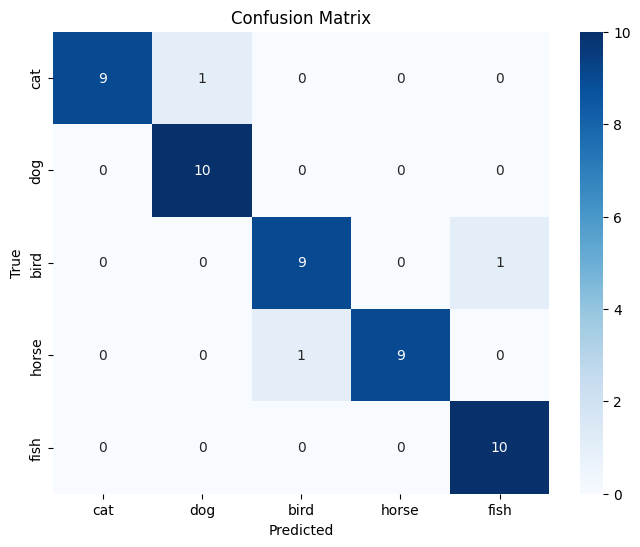

In [9]:
cm = confusion_matrix(results_df['true_label'], results_df['pred_label'], labels=categories)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('results/confusion_matrix.png')
plt.show()

## Distance Analysis
Let's see how distance affects accuracy.

In [10]:
distance_groups = results_df.groupby('distance')['correct'].mean()
print(distance_groups)

distance
close     0.894737
far       0.923077
medium    1.000000
Name: correct, dtype: float64


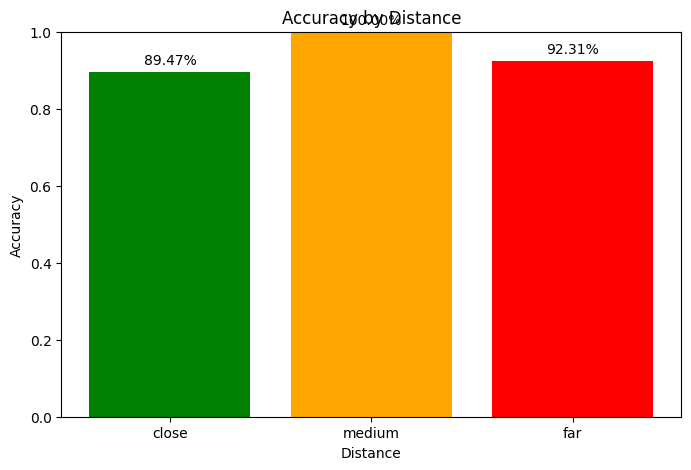

In [11]:
plt.figure(figsize=(8, 5))
distance_order = ['close', 'medium', 'far']
accs = [results_df[results_df['distance'] == d]['correct'].mean() for d in distance_order]
plt.bar(distance_order, accs, color=['green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.title('Accuracy by Distance')
plt.ylim(0, 1)
for i, v in enumerate(accs):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center')
plt.savefig('results/accuracy_by_distance.png')
plt.show()

## Prompt Matching Experiment
Test if using distance-matched prompts can improve accuracy.

In [12]:
def get_distance_prompts(dist):
    if dist == 'close':
        return [f"a close-up photo of a {c}" for c in categories]
    elif dist == 'far':
        return [f"a photo of a {c} far away" for c in categories]
    else:
        return [f"a photo of a {c}" for c in categories]

In [13]:
matched_results = []

for idx, row in data.iterrows():
    img_path = os.path.join('data/images', row['filename'])
    true_label = row['label']
    distance = row['distance']
    
    prompts = get_distance_prompts(distance)
    
    try:
        image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
        
        tokens = clip.tokenize(prompts).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
            txt_features = model.encode_text(tokens)
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)
            txt_features = txt_features / txt_features.norm(dim=-1, keepdim=True)
        
        similarity = (100.0 * image_features @ txt_features.T).softmax(dim=-1)
        values, indices = similarity[0].topk(5)
        
        pred_label = categories[indices[0].item()]
        
        matched_results.append({
            'filename': row['filename'],
            'true_label': true_label,
            'pred_label': pred_label,
            'distance': distance,
            'correct': true_label == pred_label
        })
        
    except Exception as e:
        print(f"error: {e}")

matched_df = pd.DataFrame(matched_results)

In [14]:
print("=== Comparison ===")
print(f"Standard prompts accuracy: {results_df['correct'].mean():.2%}")
print(f"Matched prompts accuracy: {matched_df['correct'].mean():.2%}")

=== Comparison ===
Standard prompts accuracy: 94.00%
Matched prompts accuracy: 96.00%


In [15]:
print("\nBy distance:")
for d in ['close', 'medium', 'far']:
    std_acc = results_df[results_df['distance'] == d]['correct'].mean()
    match_acc = matched_df[matched_df['distance'] == d]['correct'].mean()
    print(f"{d}: standard={std_acc:.2%}, matched={match_acc:.2%}, diff={match_acc-std_acc:+.2%}")


By distance:
close: standard=89.47%, matched=94.74%, diff=+5.26%
medium: standard=100.00%, matched=100.00%, diff=+0.00%
far: standard=92.31%, matched=92.31%, diff=+0.00%


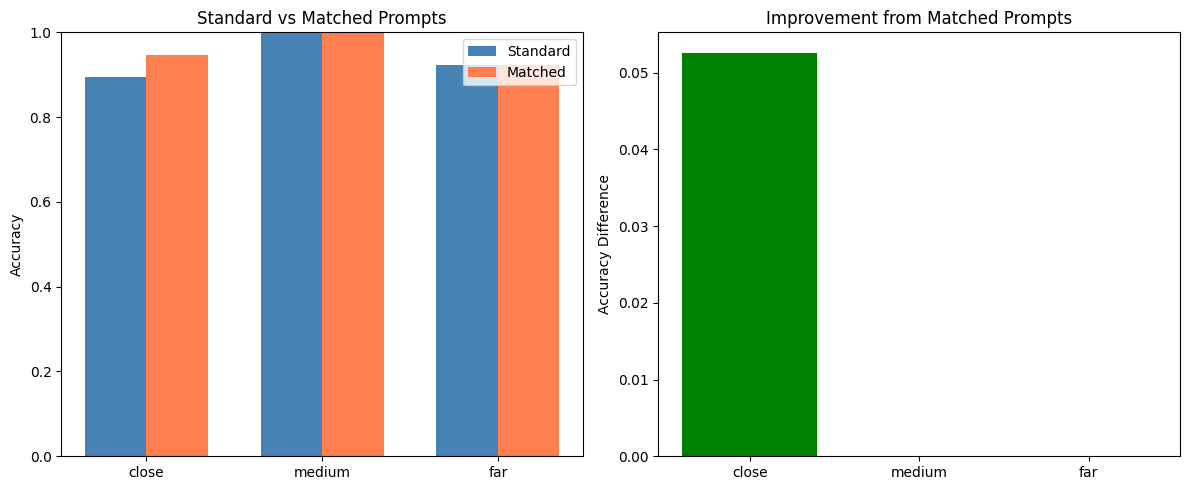

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

distance_order = ['close', 'medium', 'far']
x = np.arange(len(distance_order))
width = 0.35

std_accs = [results_df[results_df['distance'] == d]['correct'].mean() for d in distance_order]
match_accs = [matched_df[matched_df['distance'] == d]['correct'].mean() for d in distance_order]

axes[0].bar(x - width/2, std_accs, width, label='Standard', color='steelblue')
axes[0].bar(x + width/2, match_accs, width, label='Matched', color='coral')
axes[0].set_xticks(x)
axes[0].set_xticklabels(distance_order)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Standard vs Matched Prompts')
axes[0].legend()
axes[0].set_ylim(0, 1)

diffs = [m - s for s, m in zip(std_accs, match_accs)]
colors = ['green' if d > 0 else 'red' for d in diffs]
axes[1].bar(distance_order, diffs, color=colors)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_ylabel('Accuracy Difference')
axes[1].set_title('Improvement from Matched Prompts')

plt.tight_layout()
plt.savefig('results/prompt_comparison.png')
plt.show()

## Failure Case Analysis

In [17]:
failures = results_df[results_df['correct'] == False]
print(f"Total failures: {len(failures)}")
print(failures[['filename', 'true_label', 'pred_label', 'confidence', 'distance']])

Total failures: 3
        filename true_label pred_label  confidence distance
4     cat_05.jpg        cat        dog    0.611930      far
21   bird_02.jpg       bird       fish    0.359439    close
31  horse_02.jpg      horse       bird    0.440655    close


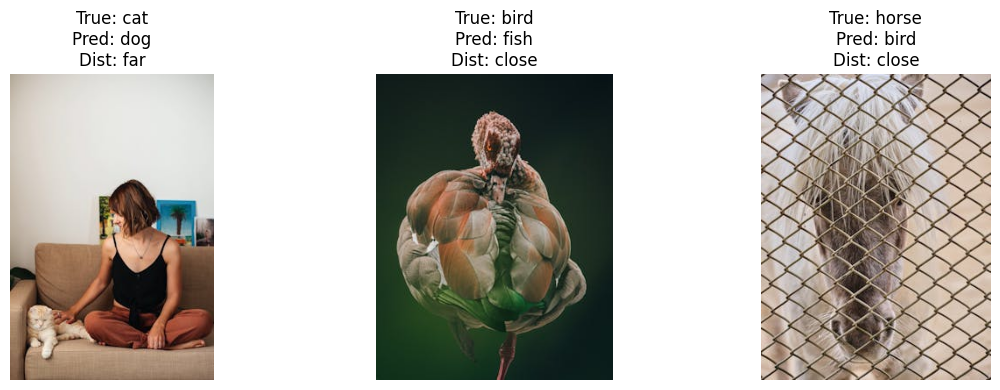

In [18]:
def show_failure_examples(df, n=6):
    failed = df[df['correct'] == False].head(n)
    
    if len(failed) == 0:
        print("no failures!")
        return
    
    cols = 3
    rows = (len(failed) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
    axes = axes.flatten() if len(failed) > 1 else [axes]
    
    for i, (idx, row) in enumerate(failed.iterrows()):
        img_path = os.path.join('data/images', row['filename'])
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"True: {row['true_label']}\nPred: {row['pred_label']}\nDist: {row['distance']}")
        axes[i].axis('off')
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.savefig('results/failure_examples.png')
    plt.show()

show_failure_examples(results_df)

## Success Case Analysis

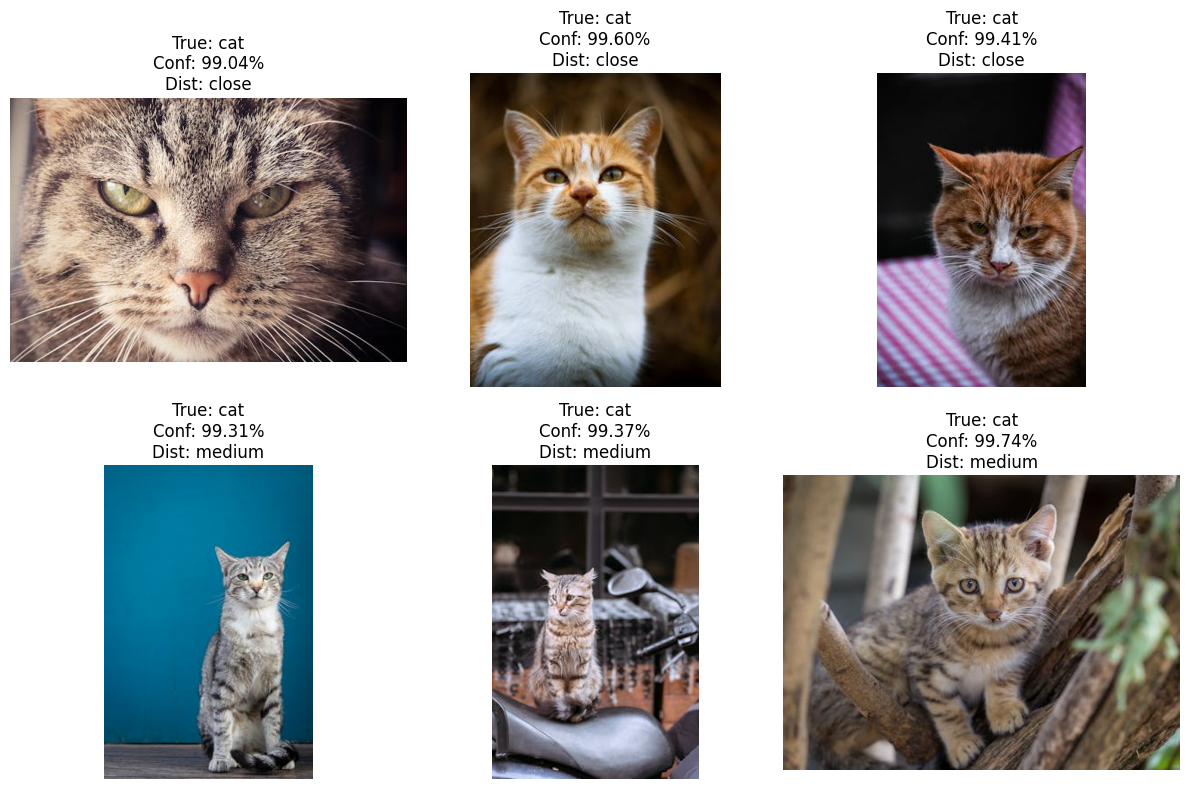

In [19]:
def show_success_examples(df, n=6):
    success = df[df['correct'] == True].head(n)
    
    cols = 3
    rows = (len(success) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4*rows))
    axes = axes.flatten()
    
    for i, (idx, row) in enumerate(success.iterrows()):
        img_path = os.path.join('data/images', row['filename'])
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"True: {row['true_label']}\nConf: {row['confidence']:.2%}\nDist: {row['distance']}")
        axes[i].axis('off')
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.savefig('results/success_examples.png')
    plt.show()

show_success_examples(results_df)

## Image Quality Metrics

In [20]:
def calc_blur(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def calc_brightness(img_path):
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return hsv[:,:,2].mean()

In [21]:
blur_scores = []
brightness_scores = []

for idx, row in results_df.iterrows():
    img_path = os.path.join('data/images', row['filename'])
    try:
        blur_scores.append(calc_blur(img_path))
        brightness_scores.append(calc_brightness(img_path))
    except:
        blur_scores.append(np.nan)
        brightness_scores.append(np.nan)

results_df['blur'] = blur_scores
results_df['brightness'] = brightness_scores

In [22]:
results_df['blur_level'] = pd.cut(results_df['blur'], bins=3, labels=['blurry', 'medium', 'sharp'])

blur_acc = results_df.groupby('blur_level')['correct'].mean()
print("Accuracy by blur level:")
print(blur_acc)

Accuracy by blur level:
blur_level
blurry    0.955556
medium    1.000000
sharp     0.500000
Name: correct, dtype: float64


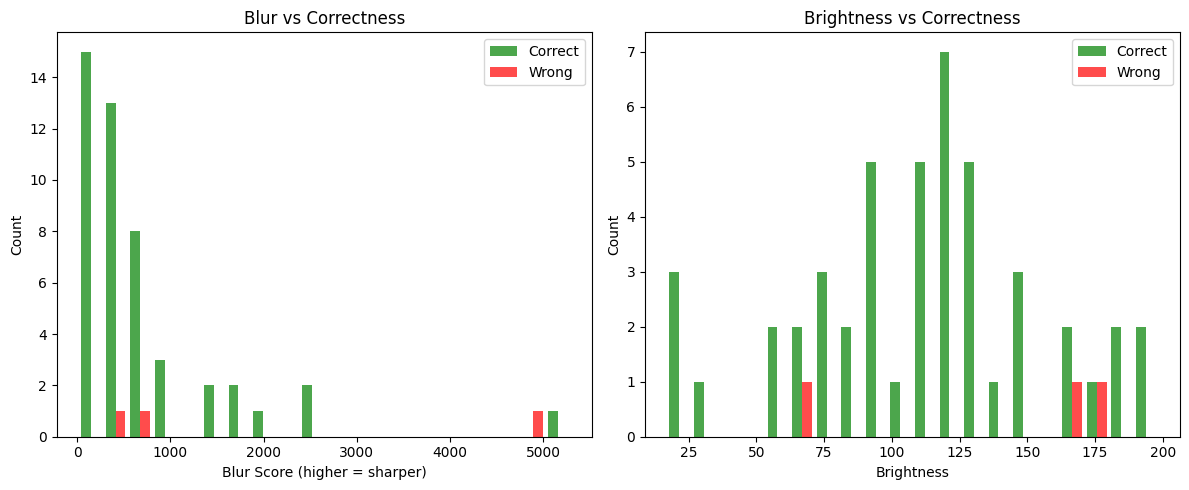

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

correct_blur = results_df[results_df['correct'] == True]['blur']
wrong_blur = results_df[results_df['correct'] == False]['blur']
axes[0].hist([correct_blur, wrong_blur], bins=20, label=['Correct', 'Wrong'], color=['green', 'red'], alpha=0.7)
axes[0].set_xlabel('Blur Score (higher = sharper)')
axes[0].set_ylabel('Count')
axes[0].set_title('Blur vs Correctness')
axes[0].legend()

correct_bright = results_df[results_df['correct'] == True]['brightness']
wrong_bright = results_df[results_df['correct'] == False]['brightness']
axes[1].hist([correct_bright, wrong_bright], bins=20, label=['Correct', 'Wrong'], color=['green', 'red'], alpha=0.7)
axes[1].set_xlabel('Brightness')
axes[1].set_ylabel('Count')
axes[1].set_title('Brightness vs Correctness')
axes[1].legend()

plt.tight_layout()
plt.savefig('results/image_quality_analysis.png')
plt.show()

## Save Results

In [24]:
results_df.to_csv('results/classification_results.csv', index=False)
matched_df.to_csv('results/matched_prompt_results.csv', index=False)
print("saved!")

saved!


## Summary Stats

In [25]:
print("=" * 50)
print("FINAL RESULTS SUMMARY")
print("=" * 50)
print(f"\nDataset: {len(data)} images across {len(categories)} categories")
print(f"\nOverall Accuracy (standard prompts): {results_df['correct'].mean():.2%}")
print(f"Overall Accuracy (matched prompts): {matched_df['correct'].mean():.2%}")
print(f"\nAccuracy by category:")
for cat in categories:
    acc = results_df[results_df['true_label'] == cat]['correct'].mean()
    print(f"  {cat}: {acc:.2%}")
print(f"\nAccuracy by distance:")
for d in ['close', 'medium', 'far']:
    acc = results_df[results_df['distance'] == d]['correct'].mean()
    print(f"  {d}: {acc:.2%}")

FINAL RESULTS SUMMARY

Dataset: 50 images across 5 categories

Overall Accuracy (standard prompts): 94.00%
Overall Accuracy (matched prompts): 96.00%

Accuracy by category:
  cat: 90.00%
  dog: 100.00%
  bird: 90.00%
  horse: 90.00%
  fish: 100.00%

Accuracy by distance:
  close: 89.47%
  medium: 100.00%
  far: 92.31%
